# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
names = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        names.append(response['name'])
        print(f"Processing data for #{(response['id'])} {city}")
    except:
        print("Oops, couldn't find that city.")

Processing data for #6170031 tuktoyaktuk
Oops, couldn't find that city.
Processing data for #2155415 new norfolk
Processing data for #3874787 punta arenas
Processing data for #2517679 fortuna
Processing data for #3471451 arraial do cabo
Processing data for #3366880 hermanus
Processing data for #2035836 manzhouli
Processing data for #3369157 cape town
Processing data for #2654970 brae
Processing data for #4030556 rikitea
Processing data for #2121025 srednekolymsk
Processing data for #2210554 surt
Processing data for #4501427 port elizabeth
Processing data for #964432 port alfred
Processing data for #292672 sharjah
Processing data for #6201424 mataura
Processing data for #945945 upington
Processing data for #5106834 albany
Processing data for #5848280 kapaa
Processing data for #4020109 atuona
Processing data for #2126123 chokurdakh
Processing data for #1337613 kulhudhuffushi
Processing data for #934479 grand gaube
Processing data for #2122090 pevek
Oops, couldn't find that city.
Processi

Processing data for #53654 mogadishu
Processing data for #3530240 atoyac
Processing data for #2928967 eschwege
Oops, couldn't find that city.
Processing data for #6087579 new glasgow
Processing data for #3395981 maceio
Processing data for #2068655 katherine
Processing data for #3424607 tasiilaq
Processing data for #2228373 maroua
Processing data for #740430 safranbolu
Processing data for #1515029 ulaangom
Processing data for #5917275 carman
Processing data for #1847947 shingu
Processing data for #601551 akdepe
Processing data for #3423146 ilulissat
Oops, couldn't find that city.
Processing data for #1651810 airai
Processing data for #1572151 nha trang
Oops, couldn't find that city.
Processing data for #3395042 mazagao
Oops, couldn't find that city.
Processing data for #6165406 thompson
Processing data for #2127515 wakkanai
Processing data for #3037456 saint-joseph
Processing data for #3822702 kantunilkin
Processing data for #588365 vao
Oops, couldn't find that city.
Processing data for

Processing data for #469960 vytegra
Processing data for #2610343 vestmanna
Processing data for #3454005 piacabucu
Oops, couldn't find that city.
Processing data for #4033557 tautira
Oops, couldn't find that city.
Processing data for #5288261 tres rios
Processing data for #187585 marsabit
Processing data for #292968 abu dhabi
Processing data for #915285 kalengwa
Processing data for #3836277 santa fe
Processing data for #1506268 gornopravdinsk
Processing data for #2028462 ulaanbaatar
Processing data for #1496476 nyagan
Processing data for #623760 pastavy
Processing data for #2737599 saldanha
Processing data for #1630058 karaton
Oops, couldn't find that city.
Processing data for #49747 xuddur
Processing data for #122438 hashtgerd
Processing data for #3985710 cabo san lucas
Processing data for #5882953 aklavik
Oops, couldn't find that city.
Processing data for #617302 rassvet
Processing data for #2026786 berezovyy
Processing data for #3583178 san vicente
Processing data for #2126710 bering

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "name": names,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
}
weather_data = pd.DataFrame(weather_dict)

In [11]:
weather_data.head()
weather_data.to_csv("../WeatherData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

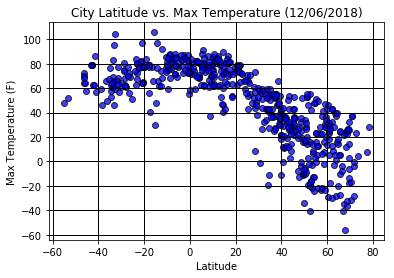

In [12]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (12/06/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsTemp.png")

#### Latitude vs. Humidity Plot

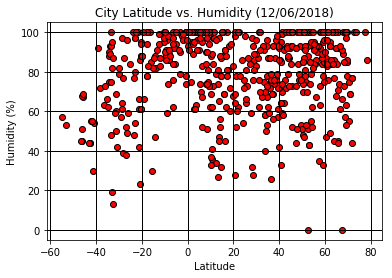

In [7]:
plt.scatter(lat, humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Humidity (12/06/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsHumidity.png")

#### Latitude vs. Cloudiness Plot

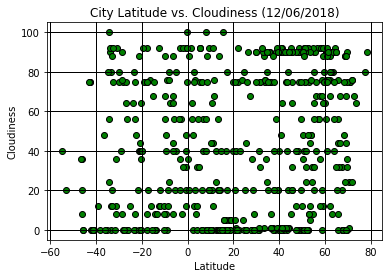

In [8]:
plt.scatter(lat, cloudiness, marker="o", facecolors="green", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (12/06/2018)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

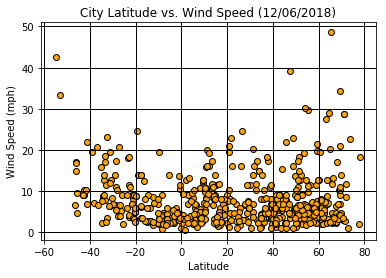

In [9]:
plt.scatter(lat, wind_speed, marker="o", facecolors="orange", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (12/06/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsWindSpeed.png")